In [11]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [13]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# # interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [14]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

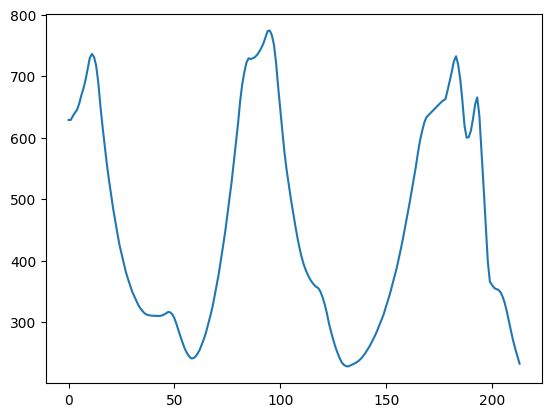

In [15]:
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [16]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

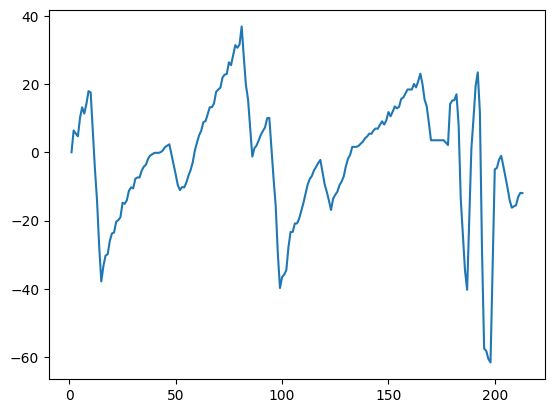

In [17]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [18]:
df_ball_positions['ball_hit']=0

In [28]:
df_ball_positions.head(20)

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,891.934937,618.727661,911.526123,639.370056,629.048859,629.048859,NaN,0
1,891.934937,618.727661,911.526123,639.370056,629.048859,629.048859,0.000000,0
2,875.947998,640.055847,893.022583,656.415588,648.235718,635.444478,6.395620,0
3,863.231201,647.973083,878.375854,666.908447,657.440765,640.943550,5.499072,0
4,851.978210,656.396301,869.881531,672.238953,664.317627,645.618365,4.674815,0
5,836.011871,671.058289,853.626251,688.250244,679.654266,655.739447,10.121082,0
6,820.045532,685.720276,837.370972,704.261536,694.990906,668.927856,13.188409,0
7,813.962463,695.760681,831.079163,714.086243,704.923462,680.265405,11.337549,0
8,796.845520,719.444702,813.204163,736.975220,728.209961,694.419244,14.153839,0
9,779.550354,743.853882,797.494507,763.971680,753.912781,712.338275,17.919031,0


In [22]:
minimum_change_frames_for_hit = 25

for i in range(1, len(df_ball_positions) - minimum_change_frames_for_hit):

    curr = df_ball_positions['delta_y'].iloc[i]
    next_ = df_ball_positions['delta_y'].iloc[i + 1]

    direction_change = (curr > 0 and next_ < 0) or (curr < 0 and next_ > 0)

    if direction_change:
        change_count = 0

        for j in range(i + 1, i + minimum_change_frames_for_hit):
            prev_dy = df_ball_positions['delta_y'].iloc[j - 1]
            curr_dy = df_ball_positions['delta_y'].iloc[j]

            if curr > 0 and curr_dy < 0:
                change_count += 1
            elif curr < 0 and curr_dy > 0:
                change_count += 1

        if change_count >= minimum_change_frames_for_hit * 0.6:
            df_ball_positions.loc[df_ball_positions.index[i], 'ball_hit'] = 1


In [23]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,778.316223,717.274353,796.398071,737.310608,727.292480,736.326965,6.460315,1
58,923.991821,236.663330,939.244690,248.063614,242.363472,241.126418,-2.923425,1
85,683.980103,719.841248,699.627930,734.781189,727.311218,729.330841,7.037939,1
95,623.748871,748.507233,641.599274,767.653564,758.080399,774.537350,1.050748,1
132,721.573478,224.166759,732.876971,238.372362,231.269561,228.096210,-0.751601,1
183,1291.191772,697.344930,1306.878255,713.367452,705.356191,732.584812,8.045970,1


In [24]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,891.934937,618.727661,911.526123,639.370056,629.048859,629.048859,NaN,0
1,891.934937,618.727661,911.526123,639.370056,629.048859,629.048859,0.000000,0
2,875.947998,640.055847,893.022583,656.415588,648.235718,635.444478,6.395620,0
3,863.231201,647.973083,878.375854,666.908447,657.440765,640.943550,5.499072,0
4,851.978210,656.396301,869.881531,672.238953,664.317627,645.618365,4.674815,0
...,...,...,...,...,...,...,...,...
209,1186.223511,248.281540,1198.353882,264.020508,256.151024,285.202257,-15.844566,0
210,1184.126343,233.775192,1195.929932,245.748276,239.761734,269.668541,-15.533716,0
211,1183.886841,227.781509,1195.056152,240.171890,233.976700,256.566527,-13.102014,0
212,1181.685913,215.558350,1193.189941,228.466049,222.012199,244.660321,-11.906206,0
